<a href="https://colab.research.google.com/github/SeathWR/Analisis_dedatos/blob/main/Incendios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [3]:
incendios = pd.read_csv("California Wildfire Damage.csv")

In [4]:
print(incendios.head())
print(incendios.info())
print(incendios.describe())

  Incident_ID        Date       Location  Area_Burned (Acres)  \
0     INC1000  2020-11-22  Sonoma County                14048   
1     INC1001  2021-09-23  Sonoma County                33667   
2     INC1002  2022-02-10  Shasta County                26394   
3     INC1003  2021-05-17  Sonoma County                20004   
4     INC1004  2021-09-22  Sonoma County                40320   

   Homes_Destroyed  Businesses_Destroyed  Vehicles_Damaged  Injuries  \
0              763                   474               235        70   
1             1633                     4               263       100   
2              915                   291                31        50   
3             1220                   128                34        28   
4              794                   469               147         0   

   Fatalities  Estimated_Financial_Loss (Million $)           Cause  
0          19                               2270.57       Lightning  
1           2                       

In [5]:
incendios.isnull().sum()

,0
Incident_ID,0
Date,0
Location,0
Area_Burned (Acres),0
Homes_Destroyed,0
Businesses_Destroyed,0
Vehicles_Damaged,0
Injuries,0
Fatalities,0
Estimated_Financial_Loss (Million $),0


In [6]:
incendios.duplicated().sum() #verificar si hay celdas duplicadas

0

In [7]:
# corrige inconsistencias en datos mal formateados
incendios['Date'] = pd.to_datetime(incendios['Date'], errors='coerce')

In [8]:
incendios['Area_Burned (Acres)'].describe()

,Area_Burned (Acres)
count,100.000000
mean,26531.460000
std,14282.123824
min,357.000000
25%,15916.250000
50%,25618.000000
75%,39775.000000
max,49653.000000


In [21]:
numerical_columns = ['Area_Burned (Acres)','Homes_Destroyed','Vehicles_Damaged','Fatalities']
categorical_columns = ['Location','Cause']
print(incendios[numerical_columns])
print(incendios[categorical_columns])

    Area_Burned (Acres)  Homes_Destroyed  Vehicles_Damaged  Fatalities
0                 14048              763               235          19
1                 33667             1633               263           2
2                 26394              915                31           6
3                 20004             1220                34           0
4                 40320              794               147          15
..                  ...              ...               ...         ...
95                13112             1468               281          17
96                39209              710               189          14
97                11863              702                40           1
98                 1338             1619               293           3
99                44299             1217               176          20

[100 rows x 4 columns]
            Location           Cause
0      Sonoma County       Lightning
1      Sonoma County       Lightning
2      Shasta

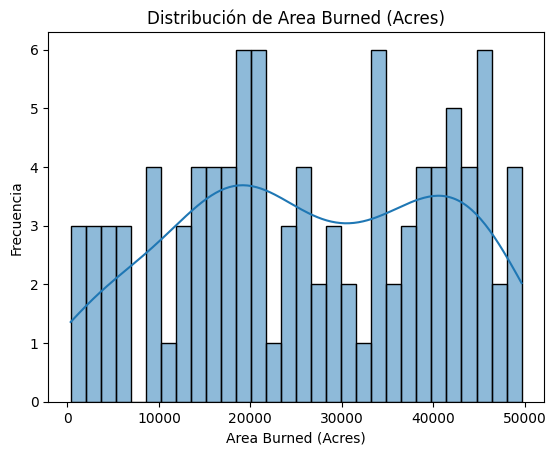

In [9]:
sns.histplot(incendios['Area_Burned (Acres)'], bins=30, kde=True)
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Area Burned (Acres)')
plt.show()

In [10]:
# se agrupan los datos por año y se sumas las acres quemadas
incendios['year'] = incendios['Date'].dt.year
yearly_data = incendios.groupby('year').agg({'Area_Burned (Acres)': 'sum'})


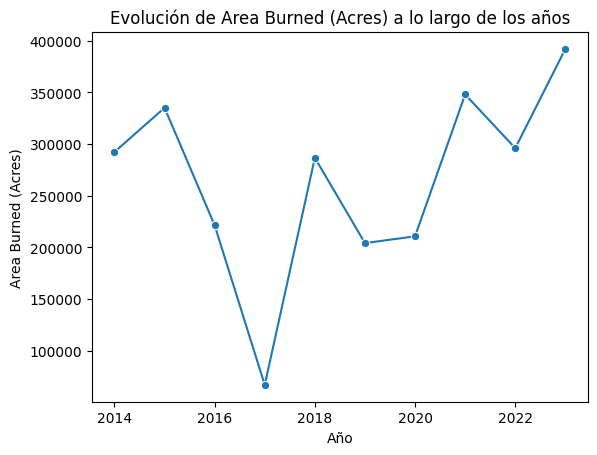

In [11]:
sns.lineplot(x=yearly_data.index, y='Area_Burned (Acres)', data=yearly_data, marker='o')
plt.xlabel('Año')
plt.ylabel('Area Burned (Acres)')
plt.title('Evolución de Area Burned (Acres) a lo largo de los años')
plt.show()

In [12]:
regiones_mas_incendios = incendios.groupby('Location')['Area_Burned (Acres)'].sum().reset_index()
regiones_mas_incendios = regiones_mas_incendios.sort_values(by='Area_Burned (Acres)', ascending=False)

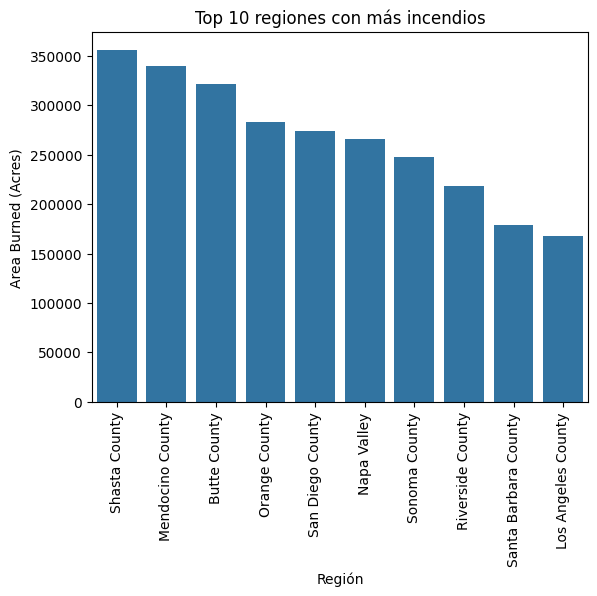

In [13]:
sns.barplot(x='Location', y='Area_Burned (Acres)', data=regiones_mas_incendios.head(10))
plt.xlabel('Región')
plt.ylabel('Area Burned (Acres)')
plt.title('Top 10 regiones con más incendios')
plt.xticks(rotation=90)
plt.show()

In [14]:
matrix = incendios[['Area_Burned (Acres)','Homes_Destroyed','Vehicles_Damaged','Fatalities']].corr()

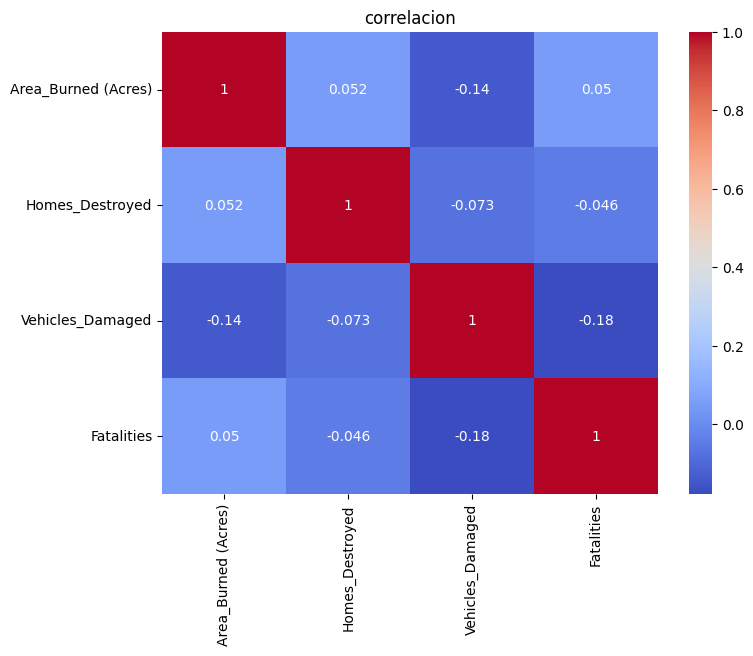

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('correlacion')
plt.show()

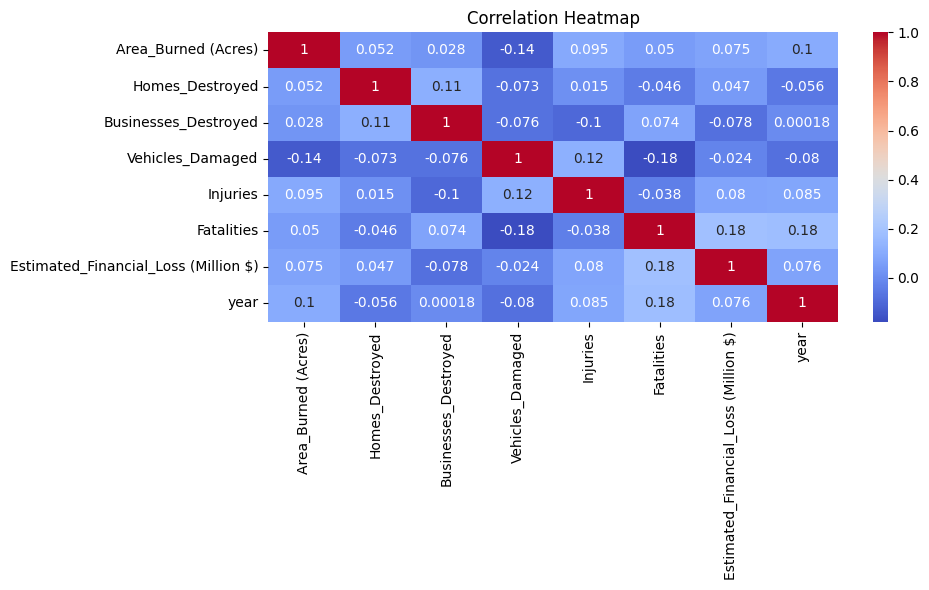

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(incendios.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [16]:
incendios['Area_Burned (Acres)'].sum()

2653146

In [17]:
print(incendios['Fatalities'].sum())
print(incendios['Injuries'].sum())
print(incendios['Vehicles_Damaged'].sum())

993
4204
15033


##filtros

In [25]:
incendios_rayos = incendios[incendios['Cause'] == 'Lightning']
incendios_provocados = incendios[incendios['Cause'] == 'Human Activity']
incendios_fuego = incendios[incendios['Cause'] == 'Fire']
incendios_desconocidos = incendios[incendios['Cause'] == 'Unknown']

print(len(incendios_provocados))
print(len(incendios_rayos))
print(len(incendios_fuego))
print(len(incendios_desconocidos))

38
31
0
31


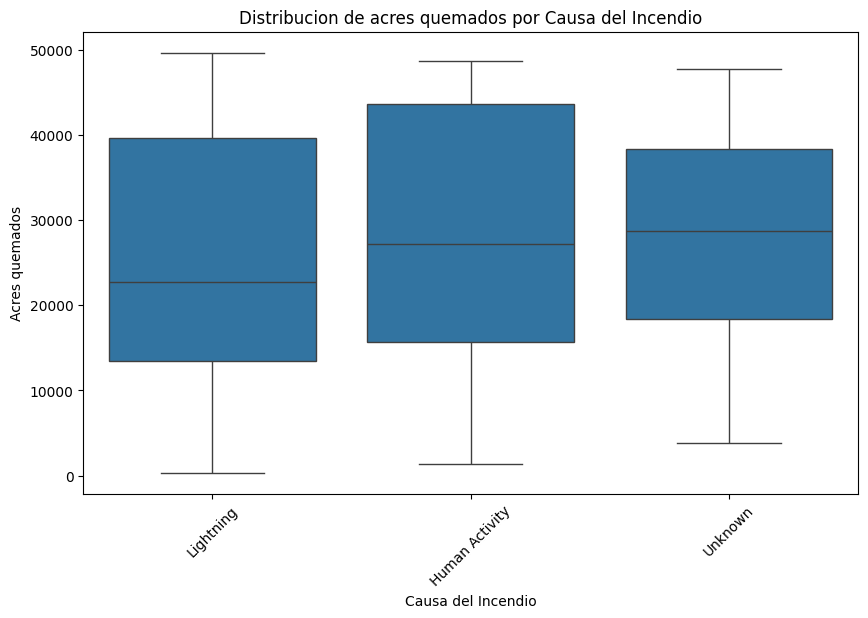

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cause', y='Area_Burned (Acres)', data=incendios)
plt.xlabel('Causa del Incendio')
plt.ylabel('Acres quemados')
plt.title('Distribucion de acres quemados por Causa del Incendio')
plt.xticks(rotation=45)
plt.show()

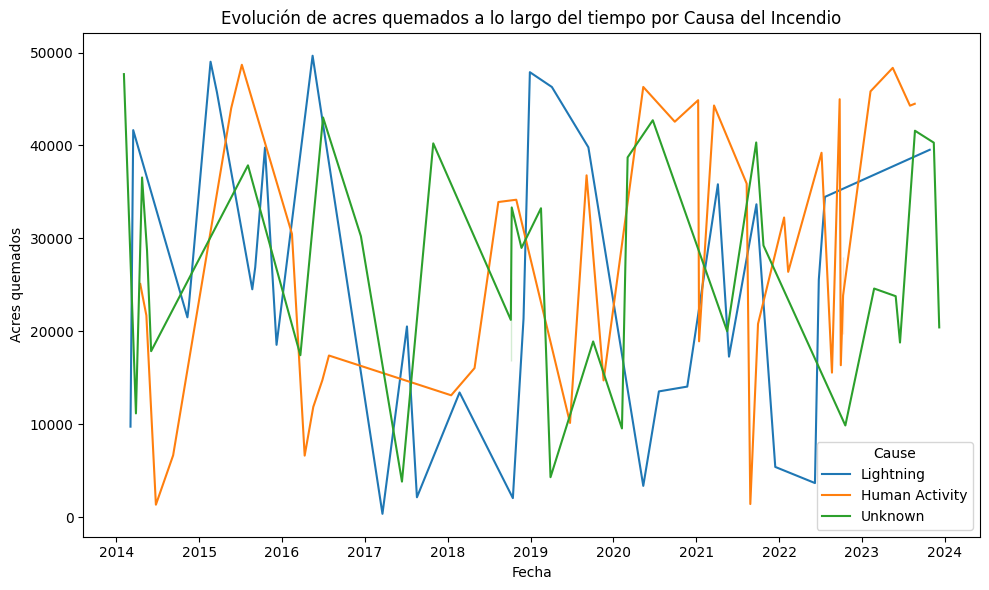

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=incendios, x='Date', y='Area_Burned (Acres)', hue= 'Cause')
plt.title('Evolución de acres quemados a lo largo del tiempo por Causa del Incendio')
plt.xlabel('Fecha')
plt.ylabel('Acres quemados')
plt.tight_layout()
plt.show()


<ipython-input-39-1602d8359b27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=incendios, x='Cause', palette='Set1')


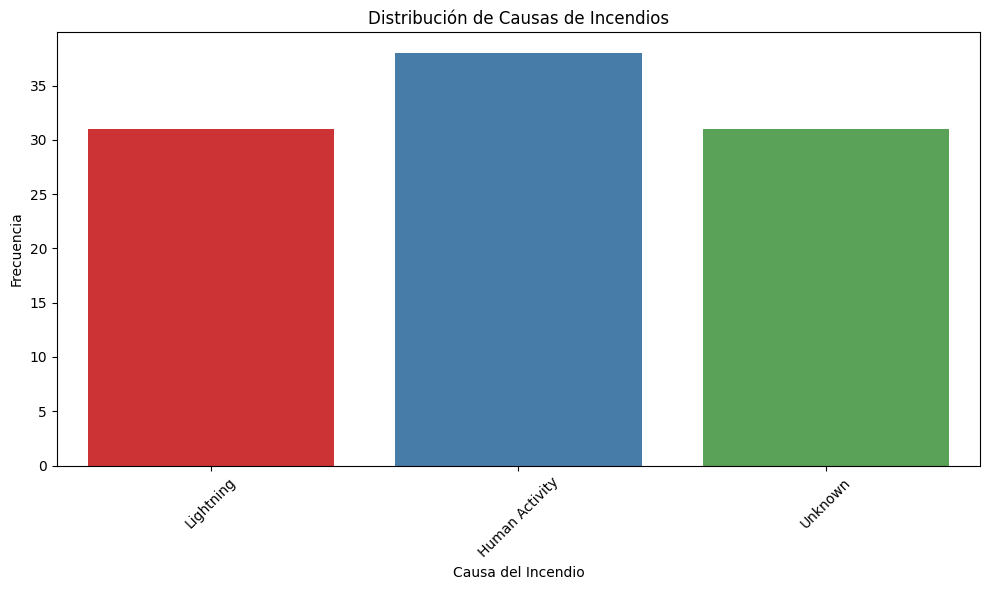

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=incendios, x='Cause', palette='Set1')
plt.xlabel('Causa del Incendio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Causas de Incendios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-40-495149781f61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=incendios_grouped, x="Estimated_Financial_Loss (Million $)", y="Location", palette="Blues")


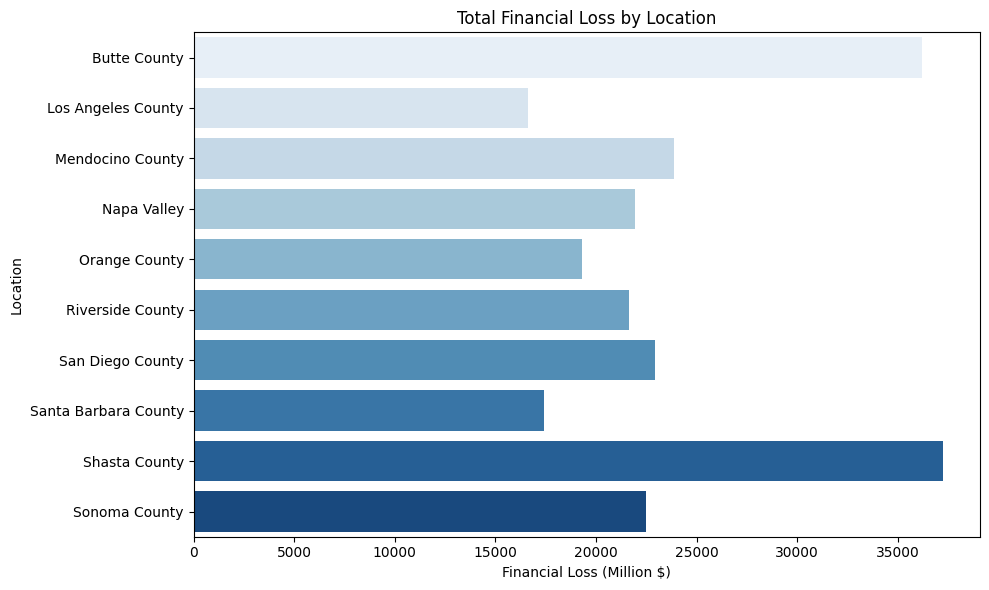

In [40]:
incendios_grouped = incendios.groupby("Location")["Estimated_Financial_Loss (Million $)"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=incendios_grouped, x="Estimated_Financial_Loss (Million $)", y="Location", palette="Blues")
plt.title("Total Financial Loss by Location")
plt.xlabel("Financial Loss (Million $)")
plt.tight_layout()
plt.show()

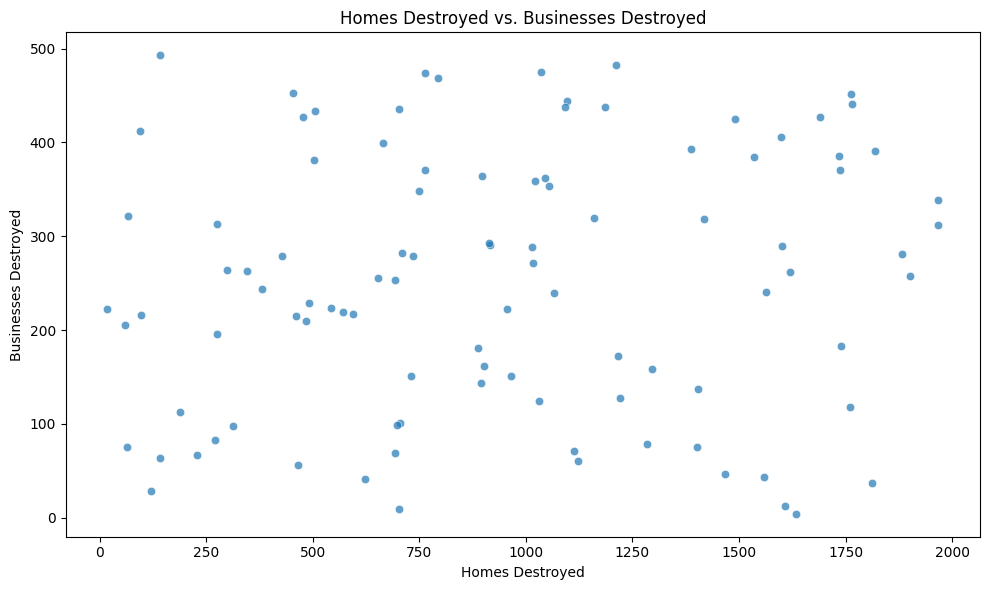

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incendios, x="Homes_Destroyed", y="Businesses_Destroyed", alpha=0.7)
plt.title("Homes Destroyed vs. Businesses Destroyed")
plt.xlabel("Homes Destroyed")
plt.ylabel("Businesses Destroyed")
plt.tight_layout()
plt.show()

<ipython-input-43-1202faea8964>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=incendios_fatalities, x="Fatalities", y="Location", palette="Reds")


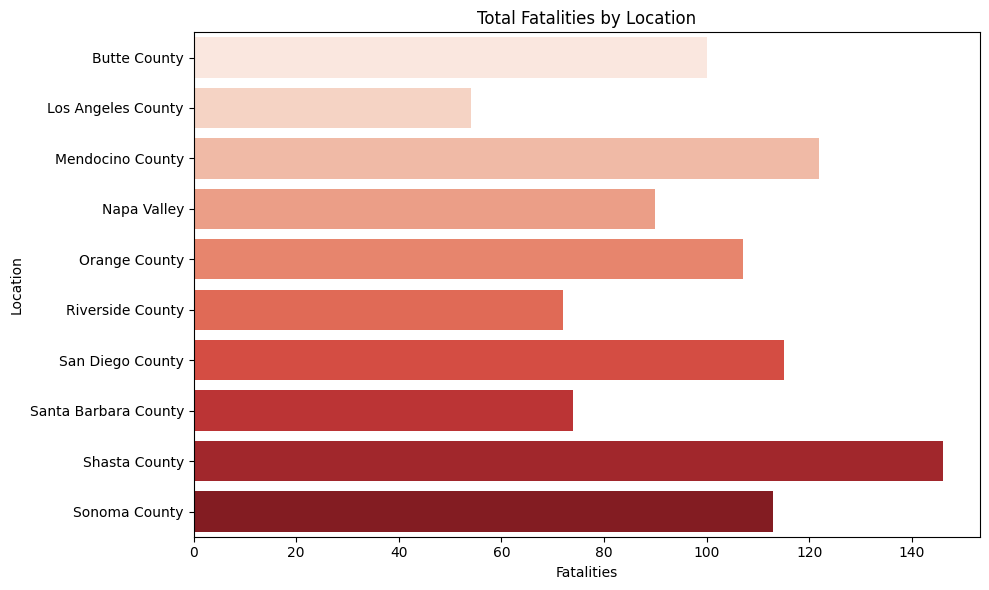

In [43]:
incendios_fatalities = incendios.groupby("Location")["Fatalities"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=incendios_fatalities, x="Fatalities", y="Location", palette="Reds")
plt.title("Total Fatalities by Location")
plt.xlabel("Fatalities")
plt.tight_layout()
plt.show()

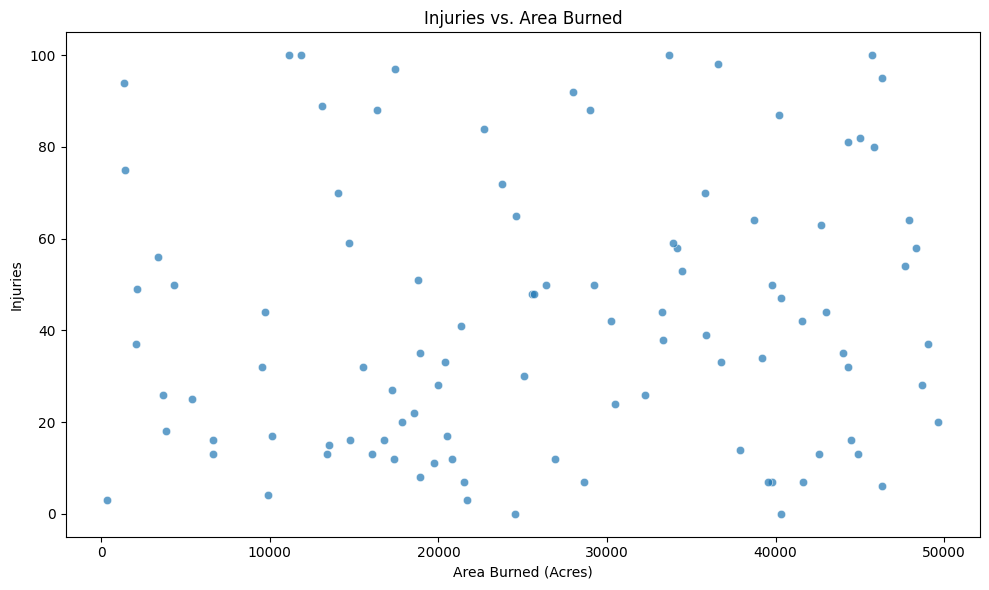

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incendios, x="Area_Burned (Acres)", y="Injuries", alpha=0.7)
plt.title("Injuries vs. Area Burned")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Injuries")
plt.tight_layout()
plt.show()

In [28]:
x = incendios[['Area_Burned (Acres)','Homes_Destroyed','Vehicles_Damaged','Fatalities']]
y = incendios['Injuries']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor()
modelo.fit(x_train, y_train)



RandomForestRegressor()

In [29]:
predicciones = modelo.predict(x_test)

In [30]:
comparacion = pd.DataFrame({'Real': y_test, 'Prediccion': predicciones})
print(comparacion.head(10))

    Real  Prediccion
83    35       40.56
53    50       41.19
70    50       43.26
45     3       63.38
44    27       66.40
39    64       36.50
22    88       32.40
80    16       36.24
10    58       36.76
0     70       48.52


In [31]:
mae = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
print(f'Mean Squared Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1023.3728150000001
R-squared: -0.5441834162608314


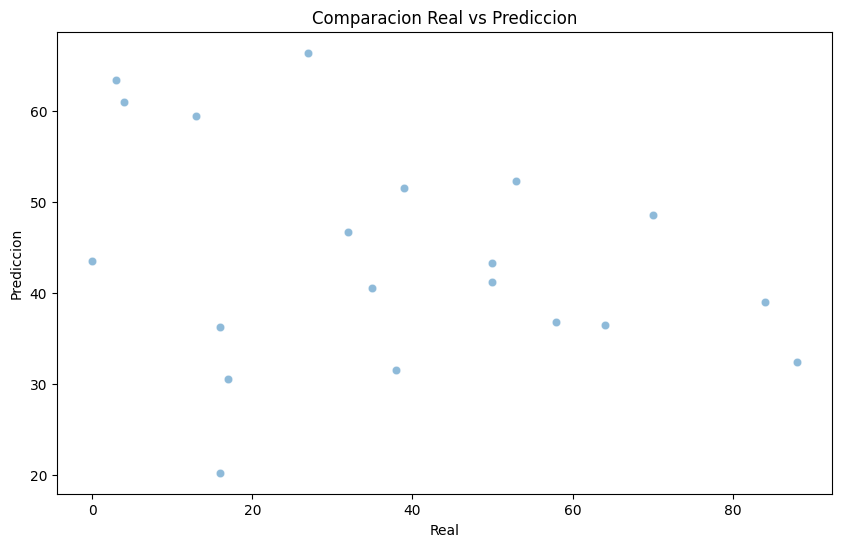

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predicciones, alpha=0.5)
plt.xlabel('Real')
plt.ylabel('Prediccion')
plt.title('Comparacion Real vs Prediccion')
plt.show()